In [ ]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataframe.head(100)

dataframe.shape

dataframe.columns

dataframe.isnull().sum()

dataframe.duplicated().sum()

np.int64(0)

In [38]:
dataframe.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [39]:
dataframe.duplicated().sum()

np.int64(0)

In [40]:
empty_string_count = (dataframe == ' ').sum().sum()

empty_string_count

np.int64(11)

In [41]:
columns_with_empty_strings = []

for column in dataframe.columns:
    if(dataframe[column] == " ").any():
        columns_with_empty_strings.append(column)


print(columns_with_empty_strings)


['TotalCharges']


In [42]:
dataframe.replace(' ', np.nan, inplace=True)

In [43]:
dataframe.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


In [44]:
features = dataframe.drop('Churn', axis=1)

target = dataframe['Churn']

In [45]:
features

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [46]:
target

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [47]:
for column in features.columns:
    print(column)
    print(dataframe[column].dtype)

features['TotalCharges'] = features['TotalCharges'].astype(float)

customerID
object
gender
object
SeniorCitizen
int64
Partner
object
Dependents
object
tenure
int64
PhoneService
object
MultipleLines
object
InternetService
object
OnlineSecurity
object
OnlineBackup
object
DeviceProtection
object
TechSupport
object
StreamingTV
object
StreamingMovies
object
Contract
object
PaperlessBilling
object
PaymentMethod
object
MonthlyCharges
float64
TotalCharges
object


In [48]:
features['TotalCharges'] = features['TotalCharges'].fillna(features['TotalCharges'].mean())

In [49]:
label_encoding_columns = []
one_hot_encoding_columns = []
binary_columns = []

for column in features:
    if features[column].dtype == object:
        print(column)
        unique_values = features[column].unique()
        unique_count = features[column].nunique()
        if unique_count == 2:
            label_encoding_columns.append(column)
        else :
            one_hot_encoding_columns.append(column)
        print(unique_values)
        print(unique_count)

binary_columns = [col for col in features.columns if features[col].dropna().isin([0, 1]).all()]

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7043
gender
['Female' 'Male']
2
Partner
['Yes' 'No']
2
Dependents
['No' 'Yes']
2
PhoneService
['No' 'Yes']
2
MultipleLines
['No phone service' 'No' 'Yes']
3
InternetService
['DSL' 'Fiber optic' 'No']
3
OnlineSecurity
['No' 'Yes' 'No internet service']
3
OnlineBackup
['Yes' 'No' 'No internet service']
3
DeviceProtection
['No' 'Yes' 'No internet service']
3
TechSupport
['No' 'Yes' 'No internet service']
3
StreamingTV
['No' 'Yes' 'No internet service']
3
StreamingMovies
['No' 'Yes' 'No internet service']
3
Contract
['Month-to-month' 'One year' 'Two year']
3
PaperlessBilling
['Yes' 'No']
2
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4


In [50]:
label_encoding_columns

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [51]:
one_hot_encoding_columns.remove('customerID')

one_hot_encoding_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [52]:
binary_columns

['SeniorCitizen']

In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = encoder.fit_transform(target)

for column in label_encoding_columns:
    features[column] = encoder.fit_transform(features[column])


In [54]:
target

array([0, 0, 1, ..., 0, 1, 0])

In [55]:
features

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60


In [56]:
features = features.drop('customerID', axis=1)

features_encoded = pd.get_dummies(features, columns=one_hot_encoding_columns).astype(int)

features_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29,29,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56,1889,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53,108,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42,1840,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70,151,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84,1990,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103,7362,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29,346,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74,306,0,...,1,0,0,1,0,0,0,0,0,1


In [57]:
one_hot_encoded_columns = []

for column in features_encoded.columns:
    if features_encoded[column].nunique() == 2 and column not in (label_encoding_columns + binary_columns):
        if features_encoded[column].between(0, 1).all():
            one_hot_encoded_columns.append(column)

one_hot_encoded_columns

['MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [58]:
excluded_columns = one_hot_encoded_columns + label_encoding_columns + binary_columns

columns_to_scale = [col for col in features_encoded.columns if col not in excluded_columns]

columns_to_scale

['tenure', 'MonthlyCharges', 'TotalCharges']

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scaling(df, scaling_type):
    if scaling_type == 0:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()

    features_scale = scaler.fit_transform(df[columns_to_scale])

    return features_scale

features_scale = scaling(features_encoded, 1)

features_encoded[columns_to_scale] = features_scale

features_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,1,0.11,0.001269,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,0.38,0.215901,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,1,0.35,0.010385,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,0.24,0.210247,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,1,0.52,0.015347,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,0.66,0.227556,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0.85,0.847450,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,0.152778,0,1,0.11,0.037849,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.055556,1,1,0.56,0.033233,0,...,1,0,0,1,0,0,0,0,0,1


In [60]:
features = pd.DataFrame(features_encoded, columns=features_encoded.columns)
target = pd.DataFrame(target, columns=['Churn'])

In [61]:
features

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,1,0.11,0.001269,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,0.38,0.215901,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,1,0.35,0.010385,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,0.24,0.210247,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,1,0.52,0.015347,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,0.66,0.227556,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0.85,0.847450,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,0.152778,0,1,0.11,0.037849,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.055556,1,1,0.56,0.033233,0,...,1,0,0,1,0,0,0,0,0,1


In [62]:
target

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [63]:
target_series = target['Churn']

correlations = features.corrwith(target_series)

sorted_correlations = correlations.abs().sort_values(ascending=False)

sorted_correlations

Contract_Month-to-month                    0.405103
tenure                                     0.352229
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
Contract_Two year                          0.302253
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
OnlineSecurity_No internet service         0.227890
TechSupport_No internet service            0.227890
StreamingTV_No internet service            0.227890
InternetService_No                         0.227890
OnlineBackup_No internet service           0.227890
DeviceProtection_No internet service       0.227890
StreamingMovies_No internet service        0.227890
TotalCharges                               0.199429
MonthlyCharges                             0.193422
PaperlessBilling                           0.191825
Contract_One

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(type(y_test))

accuracy = accuracy_score(y_test, y_pred)
accuracy

<class 'pandas.core.frame.DataFrame'>


/home/saffat/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8184397163120567

In [65]:
from logistic_regression import _LogisticRegression

features_np = features.to_numpy()
target_np = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(features_np, target_np, test_size=0.2, random_state=1234)

model_self = _LogisticRegression()

model_self.fit(X_train, y_train)

print(type(y_test))

y_pred = model_self.predict(X_test)

<class 'numpy.ndarray'>


In [66]:
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

accuracy_LR = accuracy_score(y_pred, y_test)

sensitivity_LR = recall_score(y_pred, y_test)

tn, tp, fn, fp = confusion_matrix(y_pred, y_test).ravel()
specificity_LR = tn / (tn + fp)

precision_LR = precision_score(y_pred, y_test)

f1_LR = f1_score(y_pred, y_test)

auroc_LR = roc_auc_score(y_pred, y_test)

precision_vals, recall_vals, _ = precision_recall_curve(y_pred, y_test)
aupr_LR = auc(recall_vals, precision_vals)

standard_deviation_LR = np.std(y_pred, ddof=0)

In [67]:
from bagging_ensemble import _BaggingEnsemble

bagging_ensemble_model = _BaggingEnsemble()

bagging_ensemble_model.fit(X_train, y_train)

all_preds = bagging_ensemble_model.predict_all(X_test)

final_pred = bagging_ensemble_model.final_prediction(X_test)

accuracy = accuracy_score(y_test, final_pred)

print(accuracy)

0.7764371894960965


In [68]:
standard_deviation_bagging = np.std(final_pred, ddof=0)

standard_deviation_bagging

np.float64(0.36163723031345085)

In [69]:
accuracy_bagging = accuracy_score(final_pred, y_test)

sensitivity_bagging = recall_score(final_pred, y_test)

tn, tp, fn, fp = confusion_matrix(final_pred, y_test).ravel()
specificity_bagging = tn / (tn + fp)

precision_bagging = precision_score(final_pred, y_test)

f1_bagging = f1_score(final_pred, y_test)

auroc_bagging = roc_auc_score(final_pred, y_test)

precision_vals, recall_vals, _ = precision_recall_curve(final_pred, y_test)
aupr_bagging = auc(recall_vals, precision_vals)

In [70]:
from stacking_ensemble import _StackingEnsemble

base_model = _LogisticRegression()
meta_model = _LogisticRegression()

stacking_ensemble = _StackingEnsemble(base_model, meta_model)

stacking_ensemble.fit(X_train, y_train)

final_prediction = stacking_ensemble.predict(X_test)

accuracy_stacking_ensemble = accuracy_score(y_test, final_prediction)

print(accuracy_stacking_ensemble)

0.7750177430801988


In [71]:
standard_deviation_stacking = np.std(final_prediction, ddof=0)

standard_deviation_stacking

np.float64(0.3629871697522326)

/media/saffat/Work/VSCode/CSE 472/Offline 2/stacking_ensemble.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Metric', y='Score', data=melted_metrics_df, inner="point", palette=palette)


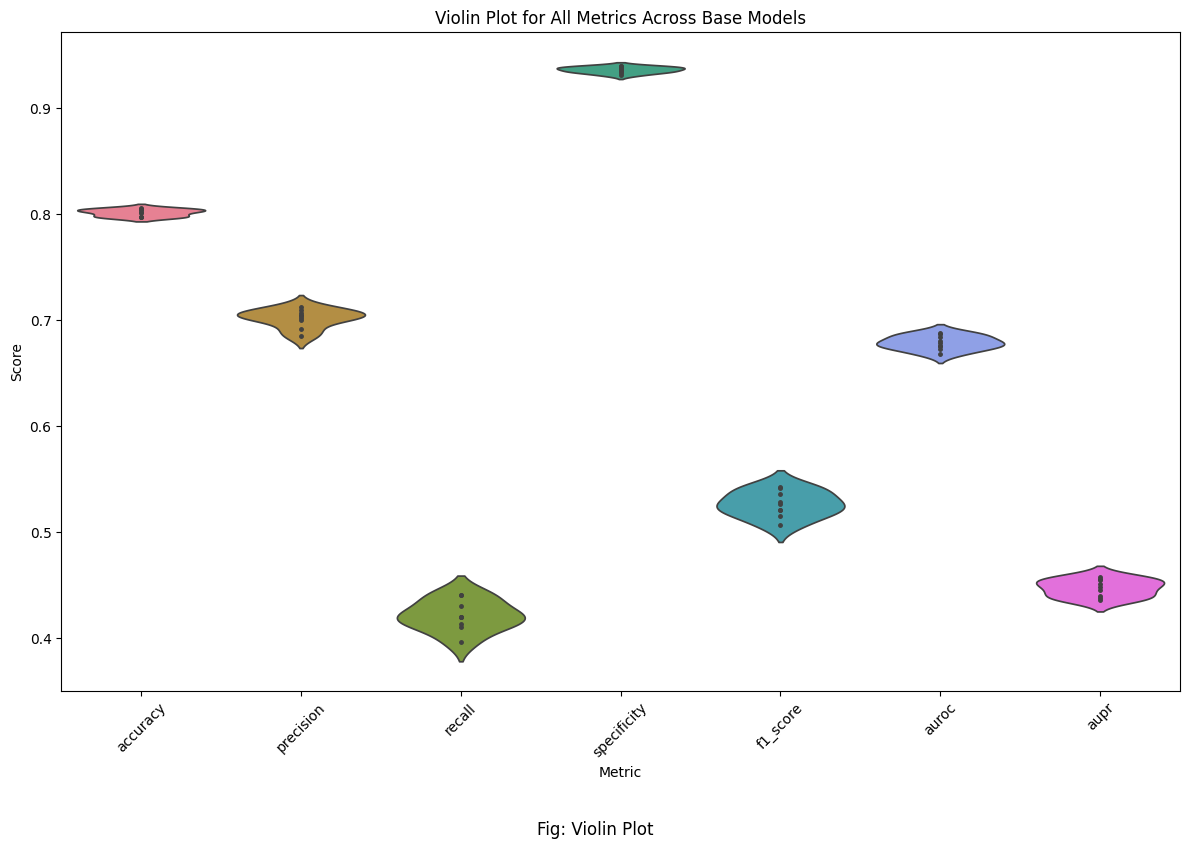

In [72]:
stacking_ensemble.plot_violin_plots()

In [73]:
accuracy_stacking = accuracy_score(final_prediction, y_test)

sensitivity_stacking = recall_score(final_prediction, y_test)

tn, tp, fn, fp = confusion_matrix(final_prediction, y_test).ravel()
specificity_stacking = tn / (tn + fp)

precision_stacking = precision_score(final_prediction, y_test)

f1_stacking = f1_score(final_prediction, y_test)

auroc_stacking = roc_auc_score(final_prediction, y_test)

precision_vals, recall_vals, _ = precision_recall_curve(final_prediction, y_test)
aupr_stacking = auc(recall_vals, precision_vals)

In [74]:
metrics = {
    "Accuracy_LR" : accuracy_LR,
    "Standard Deviation" : standard_deviation_LR,
    "Sensitivity_LR" : sensitivity_LR,
    "Specificity_LR" : specificity_LR,
    "Precision_LR" : precision_LR,
    "F1_LR" : f1_LR,
    "AUROC_LR" : auroc_LR,
    "AUPR_LR" : aupr_LR,
    "Accuracy_bagging" : accuracy_bagging,
    "Standard Deviation" : standard_deviation_bagging,
    "Sensitivity_bagging" : sensitivity_bagging,
    "Specificity_bagging" : specificity_bagging,
    "Precision_bagging" : precision_bagging,
    "F1_bagging" : f1_bagging,
    "AUROC_bagging" : auroc_bagging,
    "AUPR_bagging" : aupr_bagging,
    "Accuracy_stacking" : accuracy_stacking,
    "Standard Deviation" : standard_deviation_stacking,
    "Sensitivity_stacking" : sensitivity_stacking,
    "Specificity_stacking" : specificity_stacking,
    "Precision_stacking" : precision_stacking,
    "F1_stacking" : f1_stacking,
    "AUROC_stacking" : auroc_stacking,
    "AUPR_stacking" : aupr_stacking,
}

with open("metrics.txt", "a") as f:
    f.write("Dataset 1: \n")
    for metric, value in metrics.items():
        f.write(f"{metric}: {value}\n")